<a href="https://colab.research.google.com/github/Rafael-Barbosa/IA-para-Automacao/blob/main/Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistema de Controle Fuzzy

#### O problema da Gorgeta

##### Vamos criar um sistema de controle difuso que modela como você pode escolher dar gorjeta em um restaurante. Ao dar gorjeta, você considera o serviço e a qualidade da comida, avaliado entre 0 e 10. Você usa isso para deixar uma gorjeta entre 0 e 25%.

Formularíamos este problema como:

Antecedentes (entradas)

Serviço

*   Universo (ou seja, faixa de valor nítida): Quão bom foi o serviço da equipe de garçons, em uma escala de 0 a 10?

*   Conjunto difuso (ou seja, faixa de valor difuso): ruim, aceitável, incrível

Qualidade dos alimentos


*   Universo: Quão saborosa era a comida, em uma escala de 0 a 10?

*   Conjunto difuso: ruim, decente, ótimo

Consequências (Saídas)

Gorgeta



*   Universo: Quanto devemos dar de gorjeta, em uma escala de 0% a 25%
*   Conjunto difuso: baixo, médio, alto

Regras



*   SE o serviço foi bom ou a qualidade da comida foi boa, ENTÃO a gorjeta será alta.
*   SE o serviço foi médio, ENTÃO a gorjeta será média.
*   SE o serviço foi ruim e a qualidade da comida foi ruim ENTÃO a gorjeta será baixa.

Processo de Inferência Fuzzy:

Entradas:

Serviço: 9.8, que é classificado como "incrível".
Qualidade dos alimentos: 6.5, que está entre "decente" e "ótimo".


Regras:

Regra 1: "SE o serviço foi bom ou a qualidade da comida foi boa, ENTÃO a gorjeta será alta." Essa regra se aplica porque o serviço foi classificado como "incrível".

Regra 2: "SE o serviço foi médio, ENTÃO a gorjeta será média." Essa regra não se aplica porque o serviço não foi classificado como "médio".

Regra 3: "SE o serviço foi ruim e a qualidade da comida foi ruim ENTÃO a gorjeta será baixa." Essa regra não se aplica porque o serviço não foi classificado como "ruim", nem a qualidade da comida.


#### Exemplo


###### Se eu disser a este controlador que classifiquei:

* o serviço como 9.8, e a qualidade como 6,5.

O que recomendaria dar de gorgeta?

In [ ]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx
!pip install scikit-fuzzy
#!pip install --upgrade networkx


In [ ]:
import numpy as np
import skfuzzy as fuzzy
from math import gcd
from skfuzzy import control as ctrl

# Novos objetos Antecedentes/Consequentes contêm variáveis ​​de universo e membros
# funções
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'serviço')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'gorgeta')

#  A população da função de associação automática é possível com a qualidade .automf(3, 5 ou 7)
# automf(3) geralmente criará três conjuntos difusos, como "baixo", "médio" e "alto".
# automf(5) criará cinco conjuntos, que podem representar "muito baixo", "baixo", "médio", "alto" e "muito alto".
# automf(7) criaria sete conjuntos, acrescentando ainda mais níveis.

quality.automf(3)
service.automf(3)

# As funções de associação personalizadas podem ser construídas interativamente com uma dica de API Pythonic familiar
tip['baixa'] = fuzzy.trimf(tip.universe, [0, 0, 13])
tip['media'] = fuzzy.trimf(tip.universe, [0, 13, 25])
tip['alta'] = fuzzy.trimf(tip.universe, [13, 25, 25])

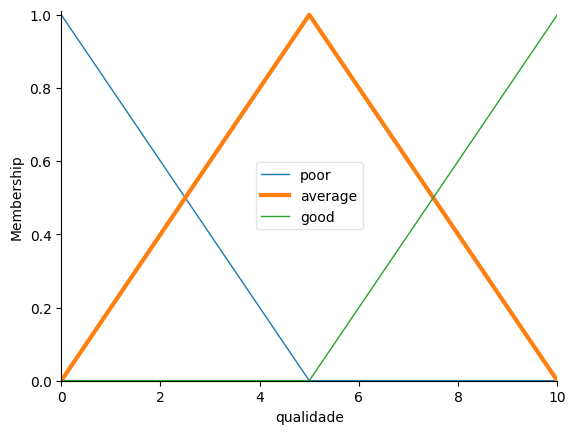

In [ ]:
quality['average'].view()
#Função de pertinência triangular

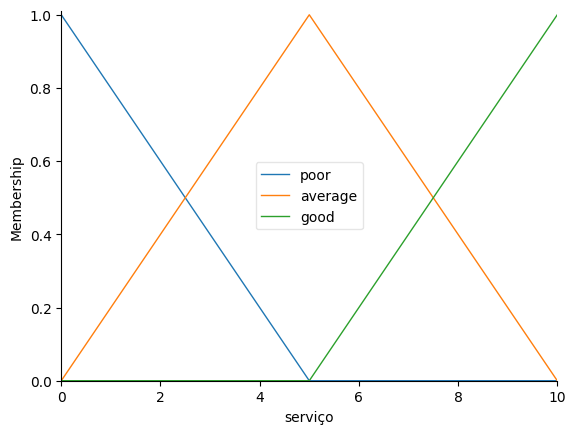

In [ ]:
service.view()

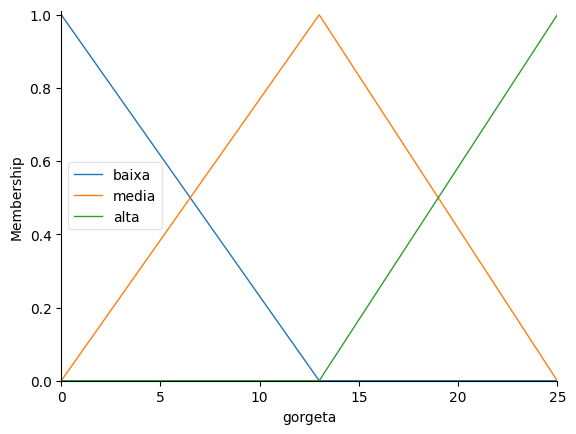

In [ ]:
tip.view()

##### Agora, para tornar esses triângulos úteis, definimos a relação difusa entre as variáveis ​​de entrada e de saída. Para os propósitos do nosso exemplo, considere três regras simples:



1. Se a comida for ruim OU o serviço for ruim, a gorjeta será baixa
2. Se o serviço for médio, a gorjeta será média
3. Se a comida for boa OU o serviço for bom, a gorjeta será alta.

##### A maioria das pessoas concordaria com essas regras, mas as regras são confusas. Mapear as regras imprecisas em uma gorgetA definida e acionável é um desafio. Este é o tipo de tarefa em que a lógica fuzzy se destaca.



(<Figure size 640x480 with 1 Axes>, <Axes: >)

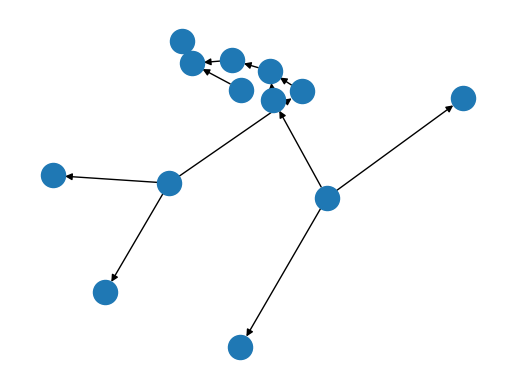

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['baixa'])
rule2 = ctrl.Rule(service['average'], tip['media'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['alta'])

rule3.view()

#### Agora que temos nossas regras definidas, podemos simplesmente criar um sistema de controle via:

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

#### Para simular este sistema de controle, criaremos um trecho ControlSystemSimulation. Pense neste objeto representando nosso controlador aplicado a um conjunto específico de circunstâncias. Para dar gorjeta, isso pode ser por exemplo, dar gorjeta a Rebeca no pub local. Nós criamos outro ControlSystemSimulation quando estamos tentando aplicar o nosso tipping_ctrl para Pedro da Padaria, isso porque as entradas são diferentes:

In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#### Agora podemos simular nosso sistema de controle simplesmente especificando as entradas e chamando o  método. Suponha que avaliemos a qualidade com 6,5 de 10 e o serviço com 9,8 de 10.

In [ ]:
# Passe entradas para o ControlSystem usando rótulos Antecedentes com API Pythonic
# Nota: se você gosta de passar muitas entradas de uma vez, use .inputs(dict_of_data)
tipping.input['qualidade'] = 8.5
tipping.input['serviço'] = 3.0
tipping.compute()

13.607154364381962


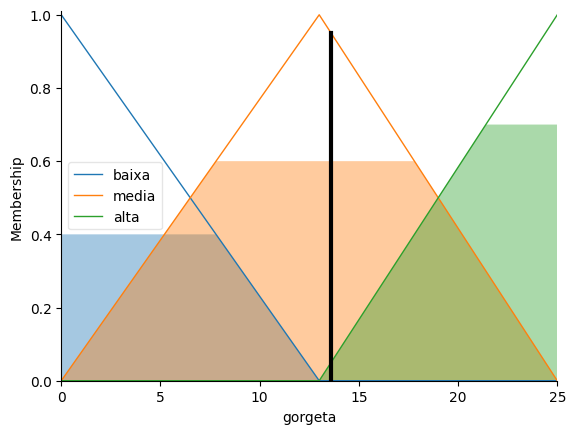

In [ ]:
print (tipping.output['gorgeta'])
tip.view(sim=tipping)

Antecedentes (Entradas):

Velocidade de Operação:
Universo: 0 a 100% (porcentagem da capacidade máxima).
Conjunto difuso: lenta, ideal, rápida.

Qualidade das Peças:
Universo: 0 a 10 (classificação da qualidade).
Conjunto difuso: baixa, aceitável, alta.

Consequências (Saídas):

Ajuste de Eficiência:
Universo: -25% a +25% (ajuste relativo à eficiência atual).

Conjunto difuso: diminuir, manter, aumentar.

Regras:

SE a Velocidade de Operação for ideal e a Qualidade das Peças for alta, ENTÃO o Ajuste de Eficiência será aumentar.

SE a Velocidade de Operação for lenta ou a Qualidade das Peças for aceitável, ENTÃO o Ajuste de Eficiência será manter.

SE a Velocidade de Operação for rápida e a Qualidade das Peças for baixa, ENTÃO o Ajuste de Eficiência será diminuir.

Exemplo:

Se a Velocidade de Operação for avaliada como 80% (próxima do ideal) e a Qualidade das Peças for avaliada como 7 (aceitável), o sistema de controle fuzzy recomendaria um Ajuste de Eficiência para manter (0% de mudança) - Eu acho.

Neste cenário, o sistema de controle fuzzy está sendo usado para monitorar e ajustar a eficiência de uma máquina em uma fábrica, com base em dois fatores observados: a Velocidade de Operação e a Qualidade das Peças Produzidas. O objetivo é manter a máquina funcionando de maneira eficiente, ajustando sua operação de acordo com as condições observadas. É um exemplo de como a lógica fuzzy pode ser aplicada para automatizar decisões complexas e subjetivas em um ambiente industrial.

# Faça o Exemplo acima